# Title
First try predict by seasonal and naive 

## Purpose
Try to use naive, seasoning naive methods for predicting

## Methodology
Use base estimators, and check results with cross-validation and MAE as metric


## Results
Have results for naive and median, seasoning not my thing


# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

import matplotlib.pyplot as plt
#%matplotlib notebook
# Autoreload extension
#if 'autoreload' not in get_ipython().extension_manager.loaded:
#    %load_ext autoreload
    
#%autoreload 2



## Local library import
We import all the required local libraries libraries

In [2]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries
import sklearn.metrics as metrics

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import
We retrieve all the required data for the analysis.

In [3]:
data = pd.read_csv('half_dataset.zip', header=[0, 1])

In [4]:
data

Unnamed: 0_level_0   timestamp_second bid_price_0                      \
       Unnamed: 0_level_1 Unnamed: 0_level_1     nunique       mean   median   
0                       0                  0           7  44.183379  44.1865   
1                       1                  1           1  44.190000  44.1900   
2                       2                  2           3  44.187467  44.1860   
3                       3                  3           3  44.181038  44.1860   
4                       4                  4           2  44.213095  44.2190   
...                   ...                ...         ...        ...      ...   
805991             805991             805991           3  40.635062  40.6340   
805992             805992             805992           2  40.634050  40.6340   
805993             805993             805993           3  40.630763  40.6340   
805994             805994             805994           1  40.619000  40.6190   
805995             805995             805995           5  40.625260  40.6190   

                                                 bid_quantity_0           \
             std     min     max   first    last        nunique      sum   
0       0.007340  44.171  44.190  44.171  44.190              5  25880.7   
1       0.000000  44.190  44.190  44.190  44.190              1     76.7   
2       0.001767  44.186  44.190  44.190  44.186              3    597.5   
3       0.006993  44.173  44.188  44.186  44.188              2   2062.8   
4       0.012474  44.188  44.219  44.188  44.219              2   6350.8   
...          ...     ...     ...     ...     ...            ...      ...   
805991  0.004853  40.626  40.641  40.641  40.634              3   5011.3   
805992  0.000224  40.634  40.635  40.634  40.635              2   1147.7   
805993  0.007162  40.606  40.634  40.634  40.619              2   3441.1   
805994  0.000000  40.619  40.619  40.619  40.619              1   4221.0   
805995  0.008114  40.619  40.644  40.619  40.644              5  11480.5   

                                                                    \
              mean median         std   min     max   first   last   
0       392.131818   43.2  756.794113   5.9  1985.0  1985.0    5.9   
1         5.900000    5.9    0.000000   5.9     5.9     5.9    5.9   
2        39.833333   60.3   24.228515   5.9    60.3     5.9   60.3   
3        39.669231   30.5   13.888033  30.5    60.3    60.3   30.5   
4       302.419048  366.4  135.157396  30.5   366.4    30.5  366.4   
...            ...    ...         ...   ...     ...     ...    ...   
805991   78.301563   60.3   47.539406   5.2   142.7   142.7   60.3   
805992   57.385000   60.3   13.036276   2.0    60.3    60.3    2.0   
805993   58.323729   60.3   10.640964   2.0    60.3    60.3   60.3   
805994   60.300000   60.3    0.000000  60.3    60.3    60.3   60.3   
805995  114.805000   60.3   63.110009  60.3   212.9    60.3   60.3   

       bid_price_1                                                ...  \
           nunique       mean   median       std     min     max  ...   
0                6  44.179379  44.1795  0.007973  44.170  44.188  ...   
1                1  44.188000  44.1880  0.000000  44.188  44.188  ...   
2                3  44.179600  44.1730  0.007337  44.173  44.188  ...   
3                4  44.172558  44.1730  0.007413  44.166  44.187  ...   
4                2  44.187810  44.1880  0.000402  44.187  44.188  ...   
...            ...        ...      ...       ...     ...     ...  ...   
805991           5  40.621922  40.6260  0.009524  40.597  40.627  ...   
805992           3  40.627450  40.6270  0.001572  40.627  40.634  ...   
805993           3  40.617593  40.6270  0.011382  40.591  40.627  ...   
805994           4  40.603214  40.6070  0.009459  40.575  40.607  ...   
805995           6  40.614300  40.6180  0.007452  40.607  40.635  ...   

       buy_trade_quantity                         sell_trade_price          \
                      std   min   max 

# Data processing

In [5]:
from sklearn.model_selection import TimeSeriesSplit
tmscv = TimeSeriesSplit(n_splits = 10)

In [18]:
target = 'y'
mean_mae = []
naive_mae = []
for train_index, test_index in tmscv.split(data):
    cv_train, cv_test = data.iloc[train_index], data.iloc[test_index]
    result_naive = cv_train[target][-1:].values[0]
    #print(result_naive)#naive method
    result_mean = np.mean(cv_train[target])
    #result_seasonal =
    #plt.plot(cv_test[target], [result_naive] * cv_test.shape[0])
    #print(len([result_mean] * cv_test['timestamp_second'].shape[0]))
    mean_mae.append(
        metrics.mean_absolute_error(cv_test[target], [result_mean] *
                                    cv_test['timestamp_second'].shape[0]))
    naive_mae.append(
        metrics.mean_absolute_error(cv_test[target], [result_naive] *
                                    cv_test['timestamp_second'].shape[0]))
    print(
        'For mean MAE is ',
        metrics.mean_absolute_error(cv_test[target], [result_mean] *
                                    cv_test['timestamp_second'].shape[0]))
    print(
        'For naive MAE is ',
        metrics.mean_absolute_error(cv_test[target], [result_naive] *
                                    cv_test['timestamp_second'].shape[0]))
#plt.plot(mean_mae, label='mean')
#plt.plot(naive_mae,label='naive')
#plt.legend()
#plt.show()
    #plt.figure(figsize=(10,8))
    #plt.plot(cv_test['timestamp_second'], cv_test[target], label = 'values')
    #plt.plot(cv_test['timestamp_second'], [result_mean] * cv_test['timestamp_second'].shape[0], 'd', label = 'mean')
    #plt.legend()
    #plt.show()
    #print(np.mean(cv_train[target]))

For mean MAE is  0.05459777381970364
For naive MAE is  0.08222312199276036
For mean MAE is  0.056095624931651426
For naive MAE is  0.05649921130502489
For mean MAE is  0.05228050839485395
For naive MAE is  0.05528970370959127
For mean MAE is  0.061441963691824725
For naive MAE is  0.11347153787982558
For mean MAE is  0.04719823093042568
For naive MAE is  0.04811835917667625
For mean MAE is  0.04199019333058521
For naive MAE is  0.07247775989993314
For mean MAE is  0.03948825080336892
For naive MAE is  0.046355749669562914
For mean MAE is  0.04513507992970048
For naive MAE is  0.046037560840820155
For mean MAE is  0.06215657610934799
For naive MAE is  0.07412776555462186
For mean MAE is  0.053539999199381544
For naive MAE is  0.055668896630559205


<AxesSubplot:>

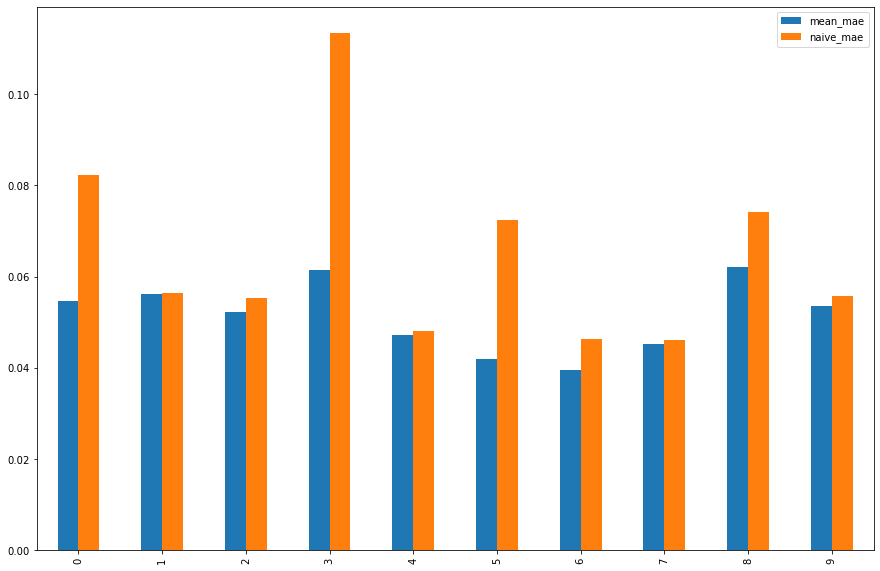

In [22]:
df = pd.DataFrame()
df['mean_mae'] = mean_mae
df['naive_mae'] = naive_mae
df.plot.bar(figsize = (15, 10))

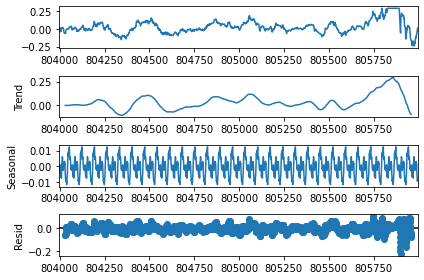

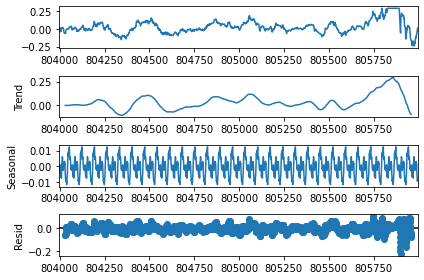

In [69]:
import statsmodels
s = statsmodels.tsa.seasonal.seasonal_decompose(data['y'][-2000:], period=70)
s.plot()

In [92]:
a = [1, 2, 4]
a[:3]

[1, 2, 4]

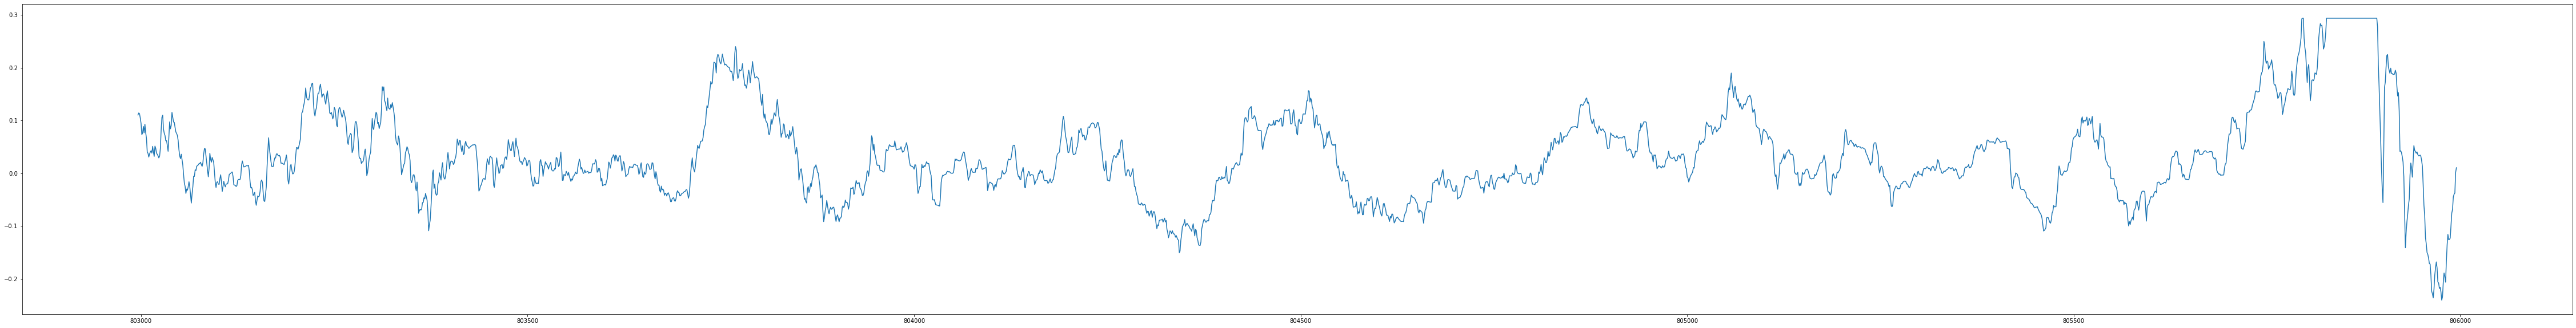

In [38]:
plt.figure(figsize=(80, 10))
plt.plot(data['timestamp_second'][-3000:], data['y'][-3000:])

402998.0


<StemContainer object of 3 artists>

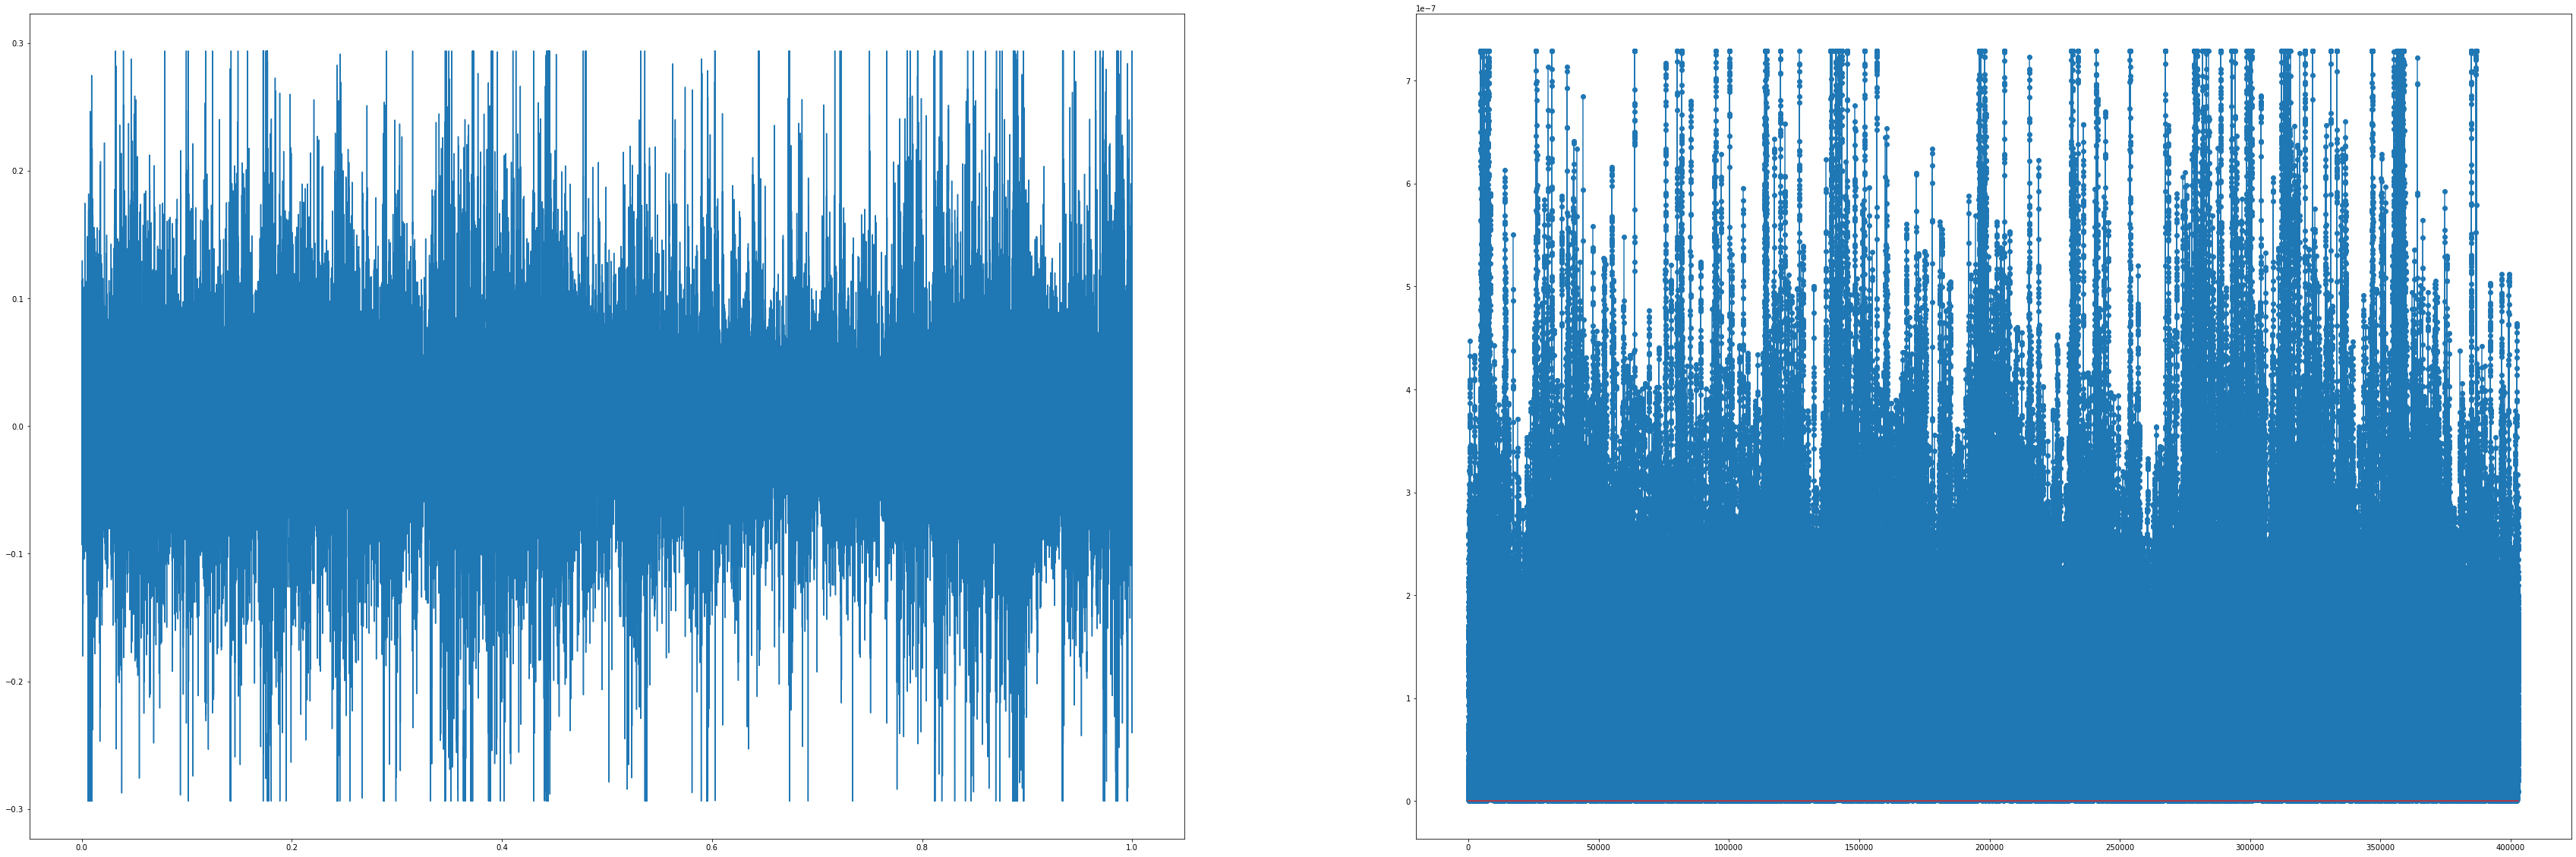

In [85]:
from scipy import fftpack
new_data = data[target]
y_fft = fftpack.fft(new_data)
Fs = new_data.shape[0] # sampling rate
t = np.arange(0,1,1/Fs)
n = np.size(t)
print(n/2)
fr = Fs/2 * np.linspace(0,1,int(n/2))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(60,20))
ax[0].plot(t, new_data)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain
#plt.plot(y_fft)

,frequency,intensity
142525,142525.353663,7.289846e-07
142561,142561.353752,7.289846e-07
196573,196573.487778,7.289846e-07
139134,139134.345248,7.289846e-07
139133,139133.345246,7.289846e-07
...,...,...
31936,31936.079246,7.289846e-07
31937,31937.079249,7.289846e-07
31938,31938.079251,7.289846e-07
205742,205742.510530,7.289846e-07


C:\Users\dcher\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning:

Casting complex values to real discards the imaginary part



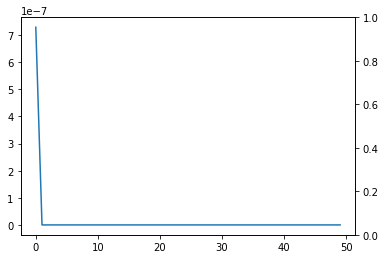

In [100]:
fft_df = pd.DataFrame()
fft_df['frequency'] = fr
fft_df['intensity'] = y_m
from_fft = fft_df.sort_values('intensity', ascending=False)[:50]
display(from_fft)
from scipy import fftpack
inv = fftpack.ifft(from_fft['intensity'].values)
fig, c1 = plt.subplots()
c2 = c1.twinx()
#c1.plot(new_data, color="orange")
c1.plot(inv)

In [101]:
inv

array([ 7.28984574e-07-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        3.42085710e-24+7.26969138e-24j, -6.73529474e-25+5.33153477e-24j,
        0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        0.00000000e+00-0.00000000e+00j,  1.61895749e-24+1.72401462e-24j,
        3.91667818e-25+2.05319460e-24j,  0.00000000e+00-0.00000000e+00j,
        1.10878052e-23+8.05576204e-24j,  0.00000000e+00-0.00000000e+00j,
        1.28904900e-24+7.08660684e-25j,  6.65476677e-25+1.21049758e-24j,
        0.00000000e+00-0.00000000e+00j,  5.85285372e-24+8.05576204e-24j,
        0.00000000e+00-0.00000000e+00j,  1.12875328e-24+2.15321205e-25j,
        8.11259702e-25+7.61823568e-25j,  0.00000000e+00-0.00000000e+00j,
        0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        1.01704465e-24-1.28482619e-25j,  9.18375594e-25+4.32154751e-25j,
        0.00000000e+00-0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  9.18375594